# QUESTION:

Part 1: PCA using NumPy

In the first part of the assignment, participants must implement Principal Component Analysis (PCA) using the NumPy library(If the data is too big to work with resize the images to 32x32 or 16x16 using skimage library). The dataset provided contains high-dimensional data, and the goal is to reduce the dimensionality using PCA while preserving the most important information. Participants will be evaluated based on their implementation, experimentation with different components.

## Let's first import the data set from kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle competitions download -c mlds-assignment-2

 93% 238M/256M [00:02<00:00, 102MB/s]
100% 256M/256M [00:02<00:00, 113MB/s]


### Unzipping the data downloaded from Kaggle

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/mlds-assignment-2.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Images are concatenated with their mask, let's separate them

#### Saving color images in my_train_img folder

In [4]:
import os
import cv2
import numpy as np

# Create a new folder to store sliced images
new_folder = "my_train_img"
os.makedirs(new_folder, exist_ok=True)

def rgb_to_gray(rgb_image):
    # Convert RGB image to grayscale
    gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
    gray_image_3d = np.expand_dims(gray_image, axis=-1)
    return gray_image_3d

# Function to slice images columnwise
def slice_images(input_folder, output_folder, width=256):
    # Iterate through each image in the input folder
    for i in range(919):# There are total 919 images
        # Read the image
        img_path = os.path.join("train/train", f"Img_{i}.png")
        image = cv2.imread(img_path)

        # Slice the image columnwise
        sliced_image = image[:, 0:256, :]  # Taking only the first 256 columns

        # Save the sliced image
        output_path = os.path.join(new_folder, f"Img_{i}.png")
        cv2.imwrite(output_path, sliced_image)

# Slice images in the specified folder and save them to the new folder
slice_images("train/train", new_folder)

#### Saving their corresponding mask (if the image file name is Img_i.png, then the name of it's mask image in my_train_seg is also Img_i.png)

In [5]:
import os
import cv2
import numpy as np

# Create a new folder to store sliced images
new_folder = "my_train_seg"
os.makedirs(new_folder, exist_ok=True)

def rgb_to_gray(rgb_image):
    # Convert RGB image to grayscale
    gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
    gray_image_3d = np.expand_dims(gray_image, axis=-1)
    return gray_image_3d

# Function to slice images columnwise
def slice_images(input_folder, output_folder, width=256):
    # Iterate through each image in the input folder
    for i in range(919):
        # Read the image
        img_path = os.path.join("train/train", f"Img_{i}.png")
        image = cv2.imread(img_path)

        # Slice the image columnwise
        sliced_image = image[:, 256:, :]  # Taking only the last 256 columns

        # Save the sliced image
        output_path = os.path.join(new_folder, f"Img_{i}.png")
        cv2.imwrite(output_path, sliced_image)

# Slice images in the specified folder and save them to the new folder
slice_images("train/train", new_folder)

## PCA:

Principal component analysis (PCA) is a dimensionality reduction and machine learning method used to simplify a large data set into a smaller set while still maintaining significant patterns and trends.

Let $X$ be a $m\times n$ data set which contains information of m samples each having n features.So, let's call ther are n feature dimensions but ofthen all the feature dimrension may not be useful or it can be a case that due to limited computation resource we may need to consider only first few the most meaningful featuers for our computation.In this case PCA plays a vital role to giver us the most valuable features.

### **Algorithm for PCA**:



Sure, here's the mathematical algorithm for Principal Component Analysis (PCA) applied to a data matrix D of size  m×n, where m is the number of samples and
n is the number of features for each sample:

#### **Standardize the Data**(optional: As it will not change the eigen-values):

Subtract the mean (μ) from each feature and divide by the standard deviation (
σ) to standardize the data:X= (D−μ)/σ
​

#### **Compute the Covariance Matrix**:

Compute the covariance matrix (Σ) of the standardized data:
Σ=(1/m-1)$X^{T}X$

#### **Compute Eigenvectors and Eigenvalues**:

Compute the eigenvectors (v) and eigenvalues (λ) of the covariance matrix
Σ:
Σv=λv

#### **Sort Eigenvalues**:

$X^{T}X$ being summetric positive semi-definite , all its eigen value will be non-negative.

Sort the eigenvalues ($\lambda_1 \ge \lambda_2 \ge ...\ge \lambda_n \ge 0 $)
in descending order and arrange the corresponding eigenvectors ($v_1,..,v_n$)accordingly.


#### **Select Principal Components**:

Choose the top k eigenvectors (principal components) that correspond to the largest eigenvalues, where k is the desired dimensionality of the reduced space.


#### **Project Data onto Principal Components**:

Project the standardized data X onto the selected k eigenvectors to obtain the reduced-dimensional representation (Z):
Z=XV,where V is a matrix containing the selected eigenvectors as columns.


#### **Explained Variance**:

Compute the explained variance ratio (explained_variance(i)) for each principal component:
explained_variance(i)= $\frac{\lambda_i}{\Sigma_{i=1}^{n}\lambda_i}$





In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

#Define the function for PCA
def pca(X, n_components):
    # Calculate mean of the data
    mean = np.mean(X, axis=0)

    # Center the data
    X_centered = X - mean

    # Compute covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Compute eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select top n_components eigenvectors
    top_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Project the data onto the selected eigenvectors
    X_pca = np.dot(X_centered, top_eigenvectors)

    return X_pca, top_eigenvectors




We projected image data set on a **10 dimensional** (considering only first 10 principal eigen-vectors) space. $X^{T}X$ being symteric positive definite it is diagonalizable and thus it has eigen vectors which are linearly independent.The result is saved in **my_train10.csv**

Also for projection on **2 dimensional**( considering only 2 pricipal eigen vectors) space is saved at **my_train_pca2.csv**, and plotted as below.




In [ ]:
# Load images
folder = "C:/Users/sk731/OneDrive/Desktop/MLDSA2/train/my_train_img/"
images = []
for i in range(919):#Total number of images in the folder
    img_path = os.path.join(folder, f"img_{i}.png")
    image = cv2.imread(img_path)
    resized_image = cv2.resize(image, (16, 16))#Resizing the image to 16*16*3
    images.append(resized_image.flatten())
X = np.array(images)

# Apply PCA to reduce dimensionality to 10 components
X_pca, _ = pca(X, 2)

# Load CSV file
csv_file = "C:/Users/sk731/OneDrive/Desktop/MLDSA2/train.csv"
df = pd.read_csv(csv_file)

# Drop "id" column from CSV
df.drop(columns=["id"], inplace=True)

# Add 2 principal components to DataFrame
for i in range(2):
    df[f"PC{i+1}"] = X_pca[:, i]

# Save updated CSV file
df.to_csv("C:/Users/sk731/OneDrive/Desktop/MLDSA2/my_train_pca_2.csv", index=False)
print("Updated CSV file saved successfully")

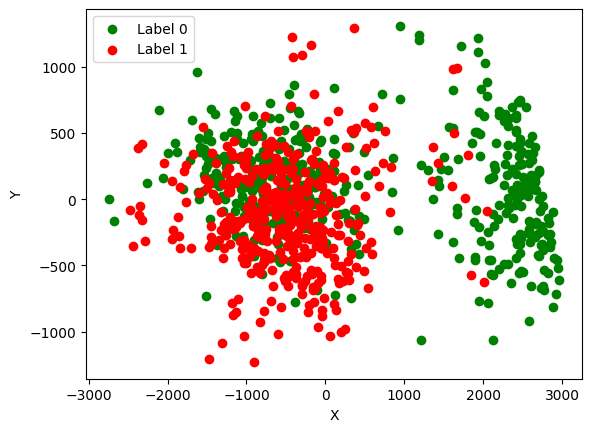

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("/content/my_train_pca_2.csv")

# Separate points based on their label
label_0 = data[data['binary_pred'] == 0]
label_1 = data[data['binary_pred'] == 1]

# Plot the points
plt.scatter(label_0['PC1'], label_0['PC2'], color='green', label='Label 0')
plt.scatter(label_1['PC1'], label_1['PC2'], color='red', label='Label 1')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Save the plot as an image
plt.savefig('pca_plot.png')

# Show the plot
plt.show()

### Comment:

As we can see with reducded dimensionality( 2 principal components only), it is very hard to classify them with a linear boundary.